In [1]:
from  calculate_simmilarity_resnet import ResnetSimmilarity

from PIL import Image
from progressbar import ProgressBar

from nearpy import Engine
from nearpy.hashes import RandomBinaryProjections
from nearpy.distances import CosineDistance

import sys


import pickle
import os
from nearpy.storage import MemoryStorage

from IPython.display import  display
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# pic_one = Image.open("./data/flower_data/train/1/image_06734.jpg")
# pic_one1 = Image.open("./data/flower_data/train/1/image_06734.jpg")
# pic_two = Image.open("./data/flower_data/train/21/image_06774.jpg")
# pic_three = Image.open("./data/download.jpeg")

### Form ResnetSimmilarity we can get embedding of a vector 

- get image embedding
        - ResnetSimmilarity() returns the image embedding by passing it through resnet Model 
- initialize LSH and add each image embedding 
- save hash table in pkl file

In [3]:
res = ResnetSimmilarity()
pbar = ProgressBar()

In [4]:
# Dimension of our vector space
dimension = 2048

# Create a random binary hash with 10 bits
rbp = RandomBinaryProjections('rbp', 10)


msote = MemoryStorage()

engine = Engine(dimension, lshashes=[rbp],storage=msote,distance=CosineDistance())

In [5]:
%%time
## Adding the Images to the Hash Table
rootdir = 'data/challenge2018/'

count = 0
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if '.jpg' in file:
            img_path = os.path.join(subdir, file)
            img = Image.open(img_path)
            
            img_emb = res.getMapping(img)
            img_emb = img_emb.view(-1,2048)
            img_emb = img_emb.numpy()
            
            
            engine.store_vector(img_emb[0],img_path)
            if count%1000 == 0:
                print("Saving  Image Embedding ",count)
                
            count += 1

('Saving  Image Embedding ', 0)
('Saving  Image Embedding ', 1000)
('Saving  Image Embedding ', 2000)
('Saving  Image Embedding ', 3000)
('Saving  Image Embedding ', 4000)
('Saving  Image Embedding ', 5000)
('Saving  Image Embedding ', 6000)
('Saving  Image Embedding ', 7000)
('Saving  Image Embedding ', 8000)
('Saving  Image Embedding ', 9000)
('Saving  Image Embedding ', 10000)
('Saving  Image Embedding ', 11000)
('Saving  Image Embedding ', 12000)
('Saving  Image Embedding ', 13000)
('Saving  Image Embedding ', 14000)
('Saving  Image Embedding ', 15000)
('Saving  Image Embedding ', 16000)
('Saving  Image Embedding ', 17000)
('Saving  Image Embedding ', 18000)
('Saving  Image Embedding ', 19000)
('Saving  Image Embedding ', 20000)
('Saving  Image Embedding ', 21000)
('Saving  Image Embedding ', 22000)
('Saving  Image Embedding ', 23000)
('Saving  Image Embedding ', 24000)
('Saving  Image Embedding ', 25000)
('Saving  Image Embedding ', 26000)
('Saving  Image Embedding ', 27000)
('Sav

In [6]:
%%time
filehandler = open("hashed_object_99k.pkl", 'w')
pickle.dump(engine, filehandler)

CPU times: user 2min, sys: 2.28 s, total: 2min 2s
Wall time: 2min 5s


### Restore Hased Table 

- read stored hash table 
- perform a search query 

In [8]:
%%time
filehandler = open("hashed_object_99k.pkl", 'r')
en_loaded = pickle.load(filehandler)

CPU times: user 35.3 s, sys: 3.97 s, total: 39.3 s
Wall time: 49.8 s


(1, 2048)


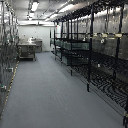

In [36]:

pic_one1 = Image.open("./data/challenge2018/78007aed6de42d1c.jpg")

# image to test query
pic_one1_emb = res.getMapping(pic_one1)
pic_one1_emb = pic_one1_emb.view(-1,2048)
pic_one1_emb = pic_one1_emb.numpy()

print(pic_one1_emb.shape)


query = pic_one1_emb[0]

display(pic_one1.resize((128,128)))

#### Query on one image and get simmilarity result

(-0.0, 'data/challenge2018/78007aed6de42d1c.jpg')


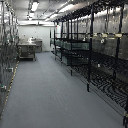

(0.00361, 'data/challenge2018/2b1bc22f3ee47ab3.jpg')


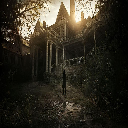

(0.00368, 'data/challenge2018/cac71b0c20dfdfb1.jpg')


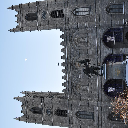

(0.00368, 'data/challenge2018/7605fadeb1d322ce.jpg')


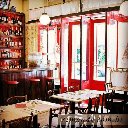

(0.0037, 'data/challenge2018/6806c5e3363f6035.jpg')


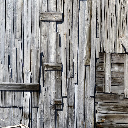

(0.00371, 'data/challenge2018/c286cbbbeae72a5e.jpg')


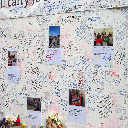

(0.00372, 'data/challenge2018/21d4b466d9027588.jpg')


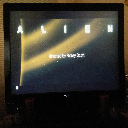

(0.00372, 'data/challenge2018/2e9457098fdae2b9.jpg')


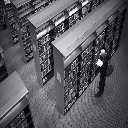

(0.00373, 'data/challenge2018/ecc1f9b7873463ba.jpg')


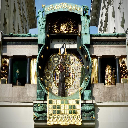

(0.00373, 'data/challenge2018/13bfe81cc0c735e9.jpg')


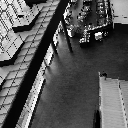

CPU times: user 676 ms, sys: 112 ms, total: 788 ms
Wall time: 734 ms


In [37]:
%%time

N = en_loaded.neighbours(query)
for i in range(len(N)):
    print(round(float(N[i][2]),5),N[i][1])
    img = Image.open(N[i][1])
    img = img.resize((128,128))
    display(img)
    if i == 10:
        break
    